#IFSC Climbing Performance & Trends (1991–2019)

**Author:** Derrick DeBuhr  
**Course:** CS3120-001  
**Due Date:** 11/30/2025

---

## Dataset

**Title:** IFSC Competition Results 1990–2019  
**Source:** Kaggle – Anthony Giorgio  
**Format:** Multi-sheet Excel Dataset  

This dataset contains historical competition results from International Federation of Sport Climbing (IFSC) events between 1991 and 2019, including competitor information, scores, ages, and national representation.

Key sheets used in this project:
- `6.1. Adult M` – Adult male competitors
- `7.1. Adult W` – Adult female competitors
- `2. Climbers` – Climber demographic information

---

## Motivation

I am an active rock climber, and I am interested in using data science to better understand how elite competitive climbing has evolved over the last three decades. Competitive climbing has grown significantly in popularity worldwide, especially following its inclusion in the Olympics, and this dataset provides a unique opportunity to analyze long-term performance and demographic trends.

This project explores how climber age, performance, and country representation have changed from 1991 to 2019, and identifies patterns in how different countries have developed their competitive climbing programs over time.

---


##Project Goal

The goal of this project is to explore and model trends in international competitive climbing using historical IFSC competition data.

Specifically, this project aims to answer the following questions:

1. How has the **age distribution of elite climbers** changed over time?
2. How does **age relate to performance scores** in adult competitions?
3. Which countries historically produce the **highest-performing climbers**?
4. Which countries are **gaining or losing professional climbers over time**?

Rather than focusing on predicting outcomes for individual climbers, this project emphasizes **exploratory trend analysis and forecasting**, with the goal of telling a coherent story about how competitive climbing has evolved globally over the past 30 years.

---


## Project Overview

This project is structured into the following major sections:

1. **Data Loading & Cleaning**
   - Load multi-sheet IFSC dataset
   - Select adult competition results
   - Clean age and score values

2. **Exploratory Data Analysis (EDA)**
   - Analyze age distributions of competitors
   - Study age trends over time
   - Examine age vs. score relationships

3. **Country-Level Trends**
   - Identify countries with highest average performance
   - Track changes in national participation over time
   - Analyze performance trends by nation

4. **Trend Modeling**
   - Fit regression models for age and performance trends
   - Identify performance slopes across decades

5. **Discussion & Conclusion**
   - Synthesize findings
   - Highlight limitations
   - Suggest future research directions

The project focuses exclusively on **adult competitors** (Men and Women) due to incomplete longitudinal data in youth divisions.

---



## Scope and Constraints

To maintain clarity and scope within a semester-long project, the following decisions were made:

- Only **adult competitors** were analyzed (youth data excluded unless needed for supplementary analysis).
- Performance is measured using the IFSC competition **score** system (0–100).
- Discipline-specific differences were not analyzed due to limited variation in available competition categories.
- The project focuses on **trend-level insights**, not on individual performance prediction.

Limitations to acknowledge:
- The interpretation of scores is limited because exact ranking mapping (e.g., difference between 95 vs 99) is not fully documented.
- Inconsistent participation across years and countries may influence trend calculations.
- Some data missingness exists in age fields, especially in early years.

---


##Environment Setup

Before diving into the analysis, we load the required libraries. These handle data manipulation, visualization, and any modeling steps later in the notebook.

- **pandas** – data handling  
- **numpy** – numerical operations  
- **matplotlib / seaborn** – plotting and visualization  
- **scikit-learn** – preprocessing and modeling  

This ensures the environment is consistent and reproducible.


In [2]:
#Import core libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

##Data Loading

The dataset is loaded into a pandas DataFrame for exploration and cleaning.  
At this stage, we focus on understanding the raw structure of the data.

Key checks performed:
- Shape of the dataset (rows × columns)
- Column names and data types

This gives us an initial sense of:
- What features are available
- Which variables might need cleaning or transformation


In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonygiorgio/ifsc-climbing-competition-results-1991-2019")

data_dir = "/root/.cache/kagglehub/datasets/anthonygiorgio/ifsc-climbing-competition-results-1991-2019/versions/2"
excel_path = os.path.join(data_dir, "IFSC Competiton Results 1990-2019 Dataset.xlsx")

data = pd.read_excel(excel_path, sheet_name=None)

# Display sheet names & shapes
print("Sheets loaded:")
for sheet, df in data.items():
    print(f"{sheet}: {df.shape}")

Using Colab cache for faster access to the 'ifsc-climbing-competition-results-1991-2019' dataset.
Sheets loaded:
Index: (25, 7)
AllCompetitions: (102249, 6)
1.Results.AllWorldChampionships: (9514, 9)
2.Climbers: (12824, 10)
3.Team Ranking: (116, 106)
4.Age Index: (56, 27)
5.Dependency Factor: (9604, 68)
RESULTS: (247, 109)
6.Results Only MEN: (5565, 8)
6.1. Adult M: (1469, 9)
6.2.Youth M: (4090, 8)
7. Results Only WOMEN: (3959, 8)
7.1.Adult W: (920, 9)
7.2.Youth W: (3036, 8)
LINK: (92, 12809)
DRAFT: (1702, 58)


In [5]:
# Extract adult datasets
adult_m = data["6.1. Adult M"]
adult_w = data["7.1.Adult W"]

print("Adult Men shape:", adult_m.shape)
print("\n\nAdult Women shape:", adult_w.shape)

Adult Men shape: (1469, 9)


Adult Women shape: (920, 9)


Clean data

In [6]:
# Function to clean adult competition data
def clean_adult_data(df):
    df = df.copy()

    # Convert age to numeric
    df['age (at time of competition)'] = pd.to_numeric(
        df['age (at time of competition)'], errors='coerce'
    )

    # Remove missing values
    df = df.dropna(subset=['age (at time of competition)', 'score'])

    # Keep reasonable age range
    df = df[(df['age (at time of competition)'] >= 15) &
            (df['age (at time of competition)'] <= 50)]

    return df

adult_m = clean_adult_data(adult_m)
adult_w = clean_adult_data(adult_w)

print("Adult Men shape:", adult_m.shape)
print("Adult Men Head: \n", adult_m.head())
print("\n\nAdult Women shape:", adult_w.shape)
print("Adult Women Head: \n", adult_w.head())

Adult Men shape: (1368, 9)
Adult Men Head: 
    year                               competition    category nation  \
1  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUS   
2  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUS   
3  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUT   
4  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUT   
5  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUT   

   climber ID   lastname firstname  score  age (at time of competition)  
1         347     Verick      Hira    0.0                          18.0  
2         546      Baker      Mark    0.0                          28.0  
3         811      Fürst    Stefan   26.0                          22.0  
4         344     Rieser    Hannes    1.0                          26.0  
5         454  Schwaiger     Josef    0.0                          20.0  


Adult Women shape: (850, 9)
Adult Women Head: 
    year                     

Let's make a scatterplot of the men and women:

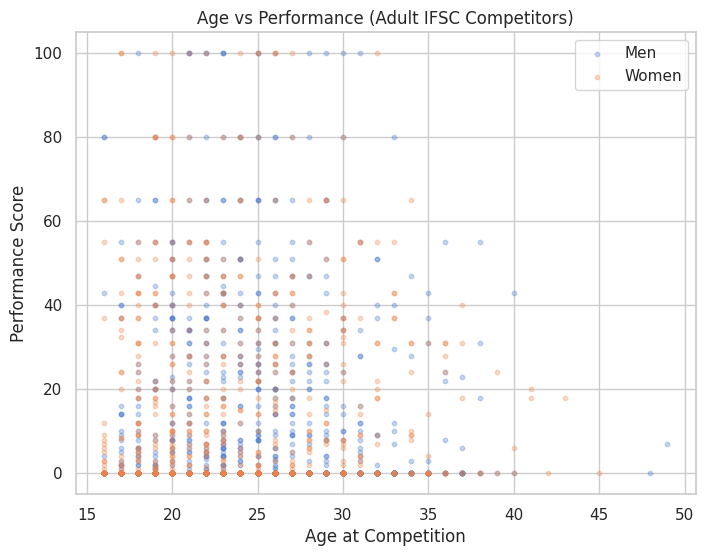

In [7]:
plt.figure(figsize=(8,6))

plt.scatter(
    adult_m['age (at time of competition)'],
    adult_m['score'],
    alpha=0.3,
    label="Men",
    s=10
)

plt.scatter(
    adult_w['age (at time of competition)'],
    adult_w['score'],
    alpha=0.3,
    label="Women",
    s=10
)

plt.xlabel("Age at Competition")
plt.ylabel("Performance Score")
plt.title("Age vs Performance (Adult IFSC Competitors)")
plt.legend()
plt.grid(True)
plt.show()


Let's add some regression lines to see if we can fit the data

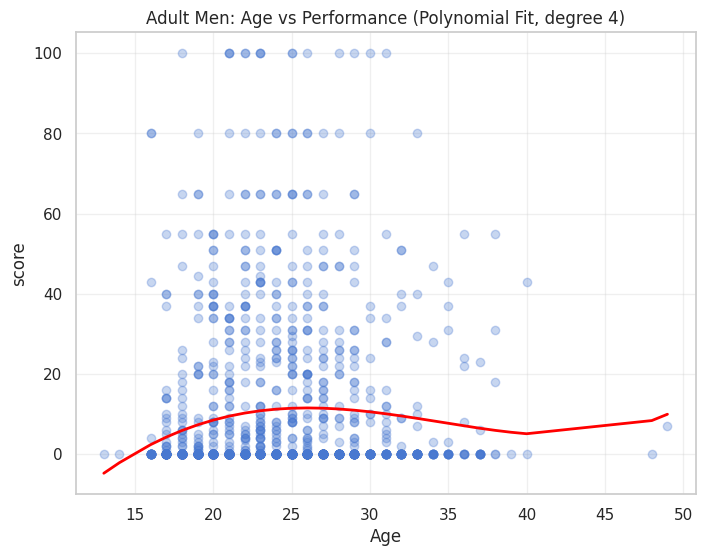

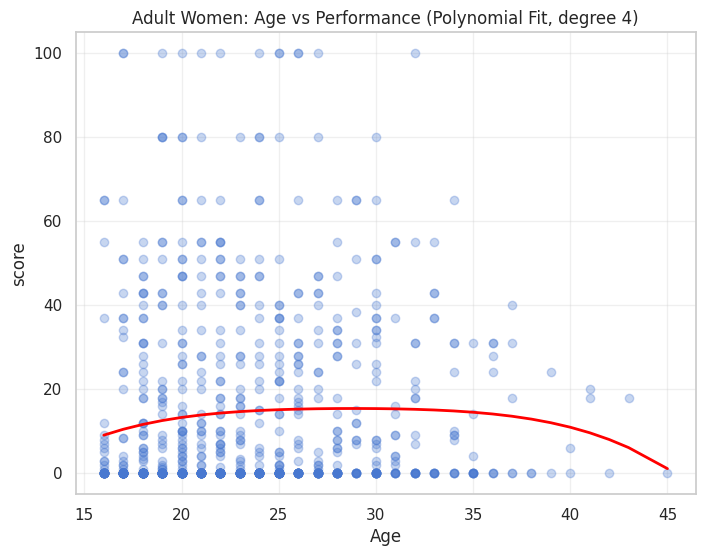

In [36]:
from sklearn.preprocessing import PolynomialFeatures

def plot_age_performance_poly(df, age_col, perf_col, title, degree=4):
    df = df[[age_col, perf_col]].dropna()

    X = df[age_col].values.reshape(-1,1)
    y = df[perf_col].values.reshape(-1,1)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_sorted = np.sort(X, axis=0)
    y_pred = model.predict(poly.transform(X_sorted))

    plt.figure(figsize=(8,6))
    plt.scatter(X, y, alpha=0.3)
    plt.plot(X_sorted, y_pred, color="red", linewidth=2)

    plt.xlabel("Age")
    plt.ylabel(perf_col)
    plt.title(f"{title} (Polynomial Fit, degree {degree})")
    plt.grid(alpha=0.3)

    plt.show()


plot_age_performance_poly(adult_m, "age (at time of competition)", "score", "Adult Men: Age vs Performance")
plot_age_performance_poly(adult_w, "age (at time of competition)", "score", "Adult Women: Age vs Performance")

### Interpretation of Results

This visualization shows how performance varies with age for adult climbers.

Key things to observe:
- The **peak performance age** for men and women
- Whether performance declines gradually or sharply with age
- Whether younger athletes are overrepresented or outperform older competitors

This analysis helps answer questions such as:
- At what age do climbers tend to perform best?
- Is professional climbing becoming dominated by younger athletes over time?
- Are men and women peaking at similar ages?


Let's try averaging the score to get a better idea of our data:

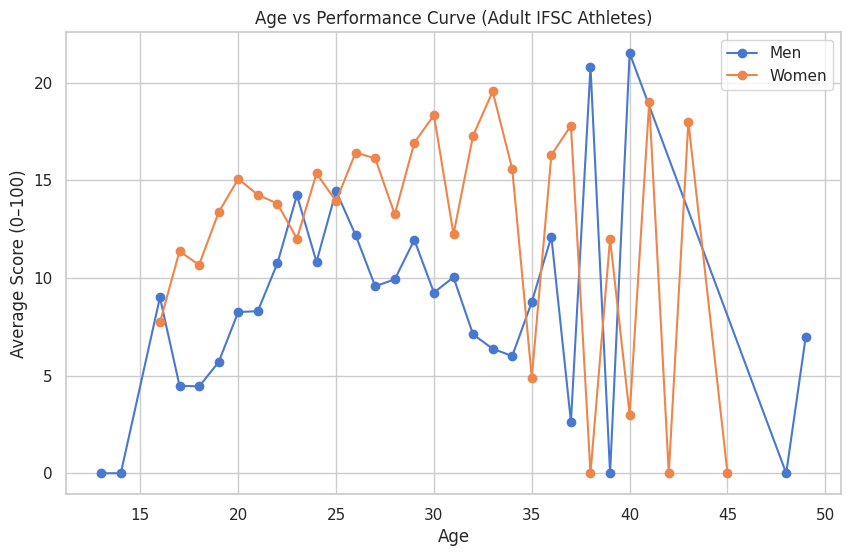

In [20]:
adult_m = data["6.1. Adult M"].copy()
adult_w = data["7.1.Adult W"].copy()

# Standardize age column
adult_m["age"] = pd.to_numeric(adult_m["age (at time of competition)"], errors="coerce")
adult_w["age"] = pd.to_numeric(adult_w["age (at time of competition)"], errors="coerce")

# Filter to valid rows
adult_m = adult_m.dropna(subset=["age", "score"])
adult_w = adult_w.dropna(subset=["age", "score"])

# Ensure numeric score
adult_m["score"] = pd.to_numeric(adult_m["score"], errors="coerce")
adult_w["score"] = pd.to_numeric(adult_w["score"], errors="coerce")

men_age_curve = (
    adult_m
    .groupby("age")["score"]
    .mean()
    .reset_index()
)

women_age_curve = (
    adult_w
    .groupby("age")["score"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))

plt.plot(men_age_curve["age"], men_age_curve["score"],
         marker="o", label="Men")

plt.plot(women_age_curve["age"], women_age_curve["score"],
         marker="o", label="Women")

plt.xlabel("Age")
plt.ylabel("Average Score (0–100)")
plt.title("Age vs Performance Curve (Adult IFSC Athletes)")
plt.legend()
plt.grid(True)

plt.show()

Now let's add some regression lines to understand the data better:

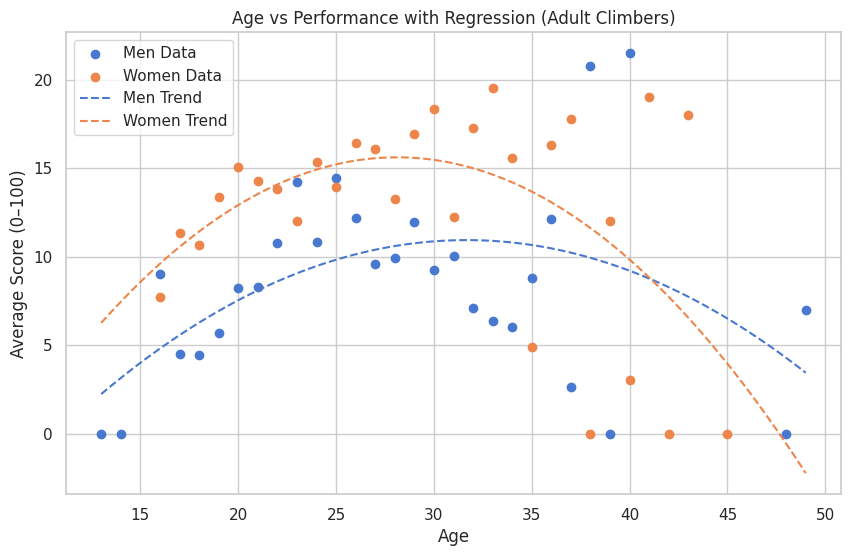

In [22]:
# Men's regression
men_coef = np.polyfit(men_age_curve["age"], men_age_curve["score"], 2)
men_poly = np.poly1d(men_coef)

# Women's regression
women_coef = np.polyfit(women_age_curve["age"], women_age_curve["score"], 2)
women_poly = np.poly1d(women_coef)

# Create smooth age range
age_range = np.linspace(
    min(men_age_curve["age"].min(), women_age_curve["age"].min()),
    max(men_age_curve["age"].max(), women_age_curve["age"].max()),
    100
)

plt.figure(figsize=(10,6))

# Original curves
plt.scatter(men_age_curve["age"], men_age_curve["score"], label="Men Data")
plt.scatter(women_age_curve["age"], women_age_curve["score"], label="Women Data")

# Regression lines
plt.plot(age_range, men_poly(age_range), linestyle="--", label="Men Trend")
plt.plot(age_range, women_poly(age_range), linestyle="--", label="Women Trend")

plt.xlabel("Age")
plt.ylabel("Average Score (0–100)")
plt.title("Age vs Performance with Regression (Adult Climbers)")
plt.legend()
plt.grid(True)

plt.show()


Now let's see if winners/competitors are getting younger

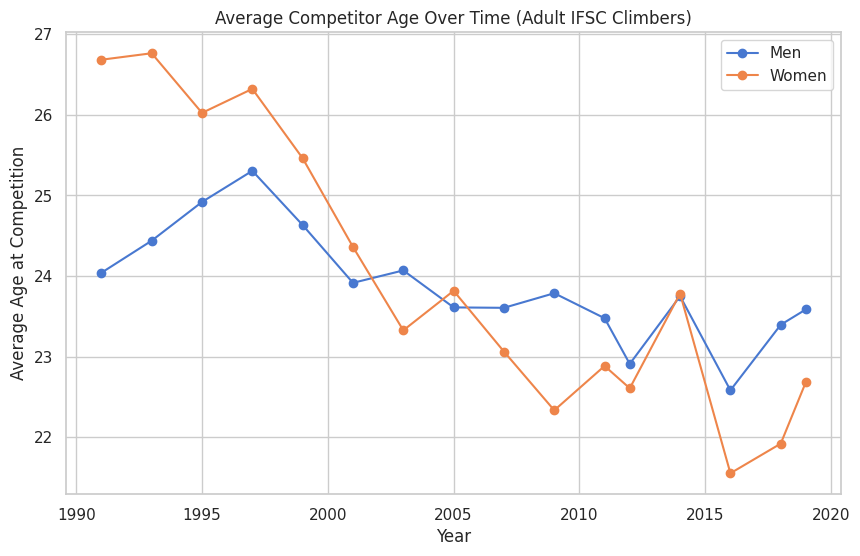

In [38]:
#Make a clean copy of the data
adult_m = data["6.1. Adult M"].copy()
adult_w = data["7.1.Adult W"].copy()

#Clean and standardize
adult_m["age"] = pd.to_numeric(adult_m["age (at time of competition)"], errors="coerce")
adult_w["age"] = pd.to_numeric(adult_w["age (at time of competition)"], errors="coerce")

adult_m = adult_m.dropna(subset=["age", "year"])
adult_w = adult_w.dropna(subset=["age", "year"])

#Compute average age per year
men_age_trend = (
    adult_m
    .groupby("year")["age"]
    .mean()
    .reset_index()
)
women_age_trend = (
    adult_w
    .groupby("year")["age"]
    .mean()
    .reset_index()
)

#Plot
plt.figure(figsize=(10,6))

plt.plot(men_age_trend["year"], men_age_trend["age"], marker="o", label="Men")
plt.plot(women_age_trend["year"], women_age_trend["age"], marker="o", label="Women")

plt.xlabel("Year")
plt.ylabel("Average Age at Competition")
plt.title("Average Competitor Age Over Time (Adult IFSC Climbers)")
plt.legend()
plt.grid(True)

plt.show()

Now let's add some regression to understand what is happening:

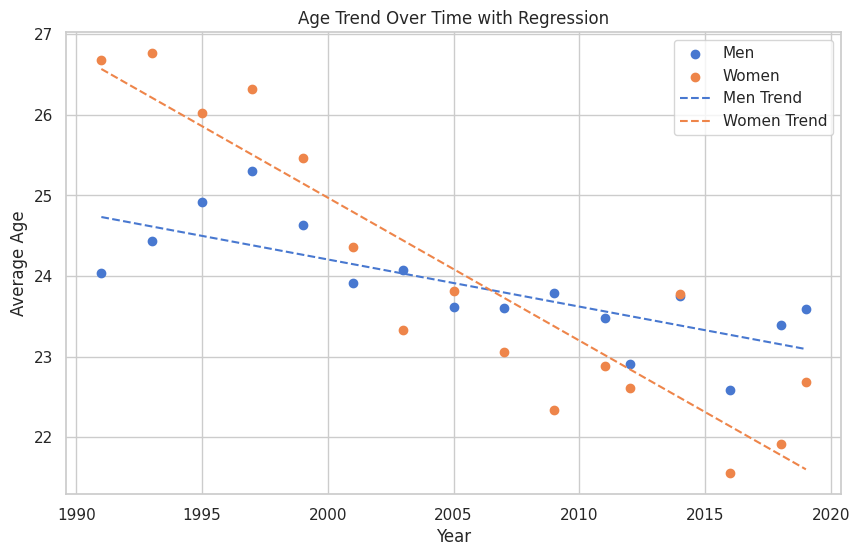

In [39]:
from numpy.polynomial.polynomial import polyfit

# Linear regression (easy to interpret)
b_men, m_men = polyfit(men_age_trend["year"], men_age_trend["age"], 1)
b_women, m_women = polyfit(women_age_trend["year"], women_age_trend["age"], 1)

years = np.array(men_age_trend["year"])

plt.figure(figsize=(10,6))

plt.scatter(men_age_trend["year"], men_age_trend["age"], label="Men")
plt.scatter(women_age_trend["year"], women_age_trend["age"], label="Women")

plt.plot(years, b_men + m_men*years, linestyle="--", label="Men Trend")
plt.plot(years, b_women + m_women*years, linestyle="--", label="Women Trend")

plt.xlabel("Year")
plt.ylabel("Average Age")
plt.title("Age Trend Over Time with Regression")
plt.legend()
plt.grid(True)

plt.show()


Interpretation:

In [40]:
print("Men age change per year:", round(m_men, 4), "years/year")
print("Women age change per year:", round(m_women, 4), "years/year")


Men age change per year: -0.0585 years/year
Women age change per year: -0.1775 years/year


Lastly, let's take a look at our data in another aspect, by country.

Which countries produce the best climbers?

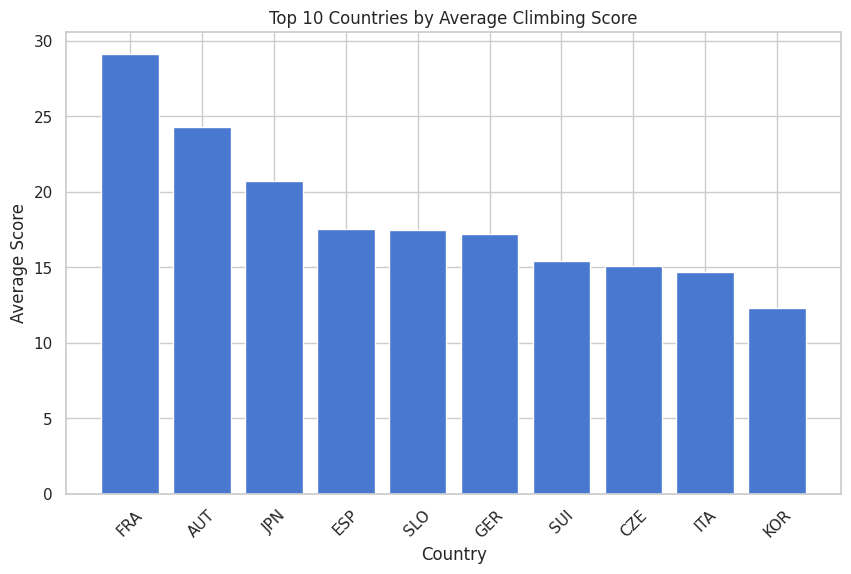

In [43]:
#Combine adult men and women brackets
combined = pd.concat([adult_m, adult_w], ignore_index=True)

combined = combined.dropna(subset=["nation", "score"])

#Average the score by country
country_performance = (
    combined
    .groupby("nation")["score"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

country_performance.head(10)


#Visualization
top10 = country_performance.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10["nation"], top10["score"])
plt.xticks(rotation=45)
plt.ylabel("Average Score")
plt.xlabel("Country")
plt.title("Top 10 Countries by Average Climbing Score")
plt.show()

This shows us that France historically produces the strongest professional climbers

Now let's see which countries are gaining or losing professional climbers over time:

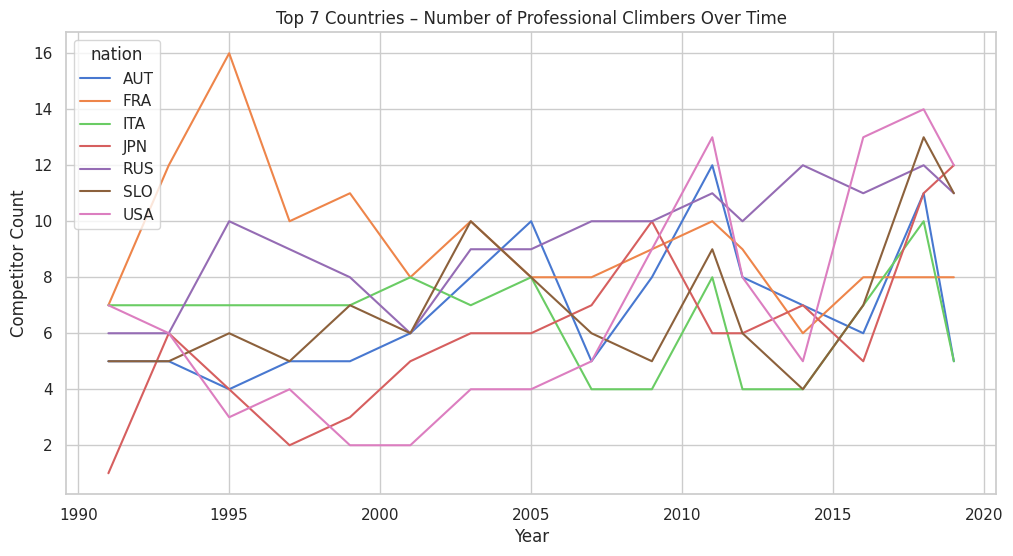

In [53]:
#Count climbers per country per year
country_trends = (
    combined
    .groupby(["year", "nation"])
    .size()
    .reset_index(name="climber_count")
)
#Focus on top countries only
top_countries = country_trends.groupby("nation")["climber_count"].sum().sort_values(ascending=False).head(7).index

filtered = country_trends[country_trends["nation"].isin(top_countries)]

#Plot
plt.figure(figsize=(12,6))

sns.lineplot(data=filtered, x="year", y="climber_count", hue="nation")

plt.title("Top 7 Countries – Number of Professional Climbers Over Time")
plt.xlabel("Year")
plt.ylabel("Competitor Count")
plt.show()


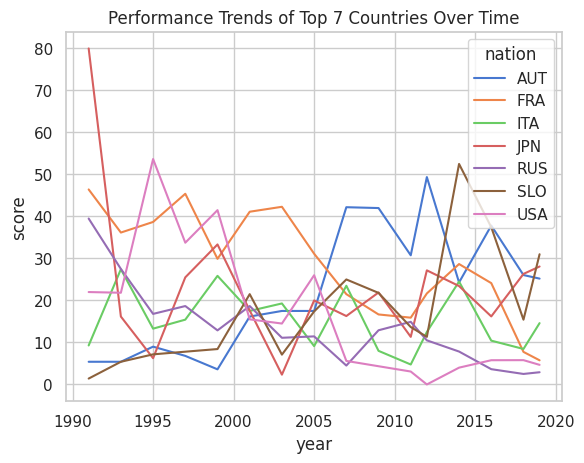

In [52]:
#Country performance trend over time
country_score_trend = (
    combined
    .groupby(["year", "nation"])["score"]
    .mean()
    .reset_index()
)

sns.lineplot(
    data=country_score_trend[country_score_trend["nation"].isin(top_countries)],
    x="year",
    y="score",
    hue="nation"
)

plt.title("Performance Trends of Top 7 Countries Over Time")
plt.show()
